<a href="https://colab.research.google.com/github/timothylombard/RSB/blob/master/RSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **-1-**
## **Analytic Approach to Project Management of PCB Designs**


---



This is a [google colabatory notebook](https://colab.research.google.com/notebooks/welcome.ipynb#).   A colab notebook has cells that run snippets of code using the Python programming language.    

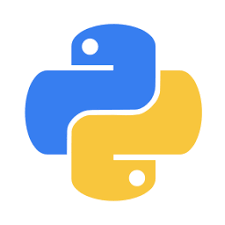

![alt text](http://bigdataexaminer.com/wp-content/uploads/2018/01/Python-Pandas-Features-Tutorial-Data-Mining-e1427131108858-750x375.jpg)

This is a Google Colab Notebook to explore a project for the Road Runner Service Bureau<br>
![alt text](https://i.pinimg.com/564x/44/f9/b2/44f9b244eb21814faec6bef4c82c2023.jpg)


# **-2-**
## **The agreement**
![alt text](https://keep.google.com/u/0/media/v2/1YQATJtiGz-MC_yfPT-8ZbXI9K04upahT7gtmHfgQEOWiODOMnTgQvxXyaBR4DqY/16RwRKT6PTOz7yt-6OoAva2LkWe_jEAqrcVpp5gDMJ3CiMsD1CVggFH3nh8KJeA?accept=image/gif,image/jpeg,image/jpg,image/png,image/webp,audio/aac&sz=634)

Let's set the parameters for this analysis.  These are variables that we can enter once and re-use. 

In [0]:
#@title Project and Key Agreement Details

project_name = 'ABC_CPU' #@param {type:"string"}
schedule = '2019-07-24' #@param {type:"date"}
budget = 8500 #@param {type:"number"}
regular_rate = 50.0 #@param {type:"number"}
overtime_rate = 75.0 #@param {type:"number"}



In [33]:
#any of the key agreement variables can be printed to check
print(budget)

9000


# **-3-**
## **Enviroment setup to read and analyse data**

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data.   For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

In [0]:
import pandas as pd  #import the pandas module and shorten to pd

For this exercise there is a csv file you can download from my git hub account.   We will create a variable and assign the path location of the csv file on github.

In [0]:
#assign variable link that points to copy of csv data
link = 'https://raw.githubusercontent.com/timothylombard/RSB/master/RSBdata.csv' #variable link now points to copy of csv data

In [0]:
df = pd.read_csv(link)   # Create a pandas dataframe from the data assigned to the link variable. 

In [37]:
print(df)# Print out the contents of the dataframe 

         Date  Placed  Total Components  ...  DRC Errors  Reg Hours  OT Hours
0  2017-01-01       0              2946  ...           0         12         0
1  2017-01-04    1432              2946  ...        4028         48         0
2  2017-01-07    2946              2946  ...         266         48        18
3  2017-01-10    2946              2946  ...           0         30         0
4  2017-01-13    2247              3588  ...        9204         38         4
5  2017-01-16    3588              3588  ...        4859         40         8
6  2017-01-18    3588              3588  ...           0         16         4

[7 rows x 8 columns]


In [38]:
list(df) #list the column names

['Date',
 'Placed',
 'Total Components',
 'Connections',
 'Connected',
 'DRC Errors',
 'Reg Hours',
 'OT Hours']

# -4- Calculated Columns 







### 4.1 $Percent Placed = \frac{parts Placed}{TotalComponentCount}$

In [39]:
# add a new calculated column for the percentage placed 
df['pctPlaced'] = df['Placed']/df['Total Components']
list(df) #list the column names


['Date',
 'Placed',
 'Total Components',
 'Connections',
 'Connected',
 'DRC Errors',
 'Reg Hours',
 'OT Hours',
 'pctPlaced']

### 4.2 $Percent Connected = \frac{Connected}{Connections}$

In [40]:
# add a new calculated column for the percentage connected 
df['pctConn'] = df['Connected']/df['Connections']
list(df) #list the column names

['Date',
 'Placed',
 'Total Components',
 'Connections',
 'Connected',
 'DRC Errors',
 'Reg Hours',
 'OT Hours',
 'pctPlaced',
 'pctConn']

In [41]:
#Print out the new columns 
print(df[['pctPlaced','pctConn']])

   pctPlaced   pctConn
0   0.000000  0.000000
1   0.486083  0.021453
2   1.000000  0.858158
3   1.000000  1.000000
4   0.626254  0.584761
5   1.000000  0.890489
6   1.000000  1.000000


# -5- Setup for Plotting

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from matplotlib.pyplot import text


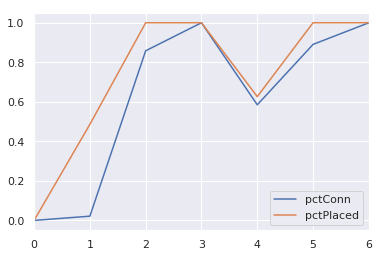

In [44]:
df[['pctConn','pctPlaced']].plot();

Notice the Y axis is in percentage complete but the X axis is an interger.   It would be more helpful if the X axis was a date rather than a sequence. 
To plot progess over time the data in the "Date" column needs to be converted into datetime format.

In [45]:
df['Date'] =  pd.to_datetime(df['Date'])
print(df)

        Date  Placed  Total Components  ...  OT Hours  pctPlaced   pctConn
0 2017-01-01       0              2946  ...         0   0.000000  0.000000
1 2017-01-04    1432              2946  ...         0   0.486083  0.021453
2 2017-01-07    2946              2946  ...        18   1.000000  0.858158
3 2017-01-10    2946              2946  ...         0   1.000000  1.000000
4 2017-01-13    2247              3588  ...         4   0.626254  0.584761
5 2017-01-16    3588              3588  ...         8   1.000000  0.890489
6 2017-01-18    3588              3588  ...         4   1.000000  1.000000

[7 rows x 10 columns]


This data frame has an index just to the left of the Date column,   Lets use the Date column as the index with the command below.

In [0]:
df.set_index('Date', inplace=True) #update the index to use the  the Date column to be index

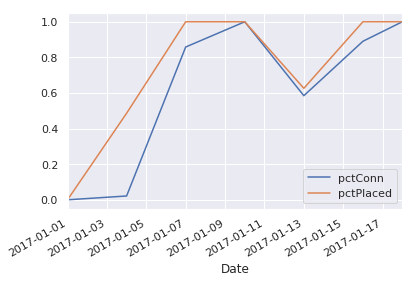

In [47]:
df[['pctConn','pctPlaced']].plot();

# -6- Budget Calculations

First, lets create another calculated field for  Running Total  of the regular hours as time goes on.

In [0]:
df['regrunning'] = df['Reg Hours'].cumsum()


In [56]:
print(df['regrunning'])

Date
2017-01-01     12
2017-01-04     60
2017-01-07    108
2017-01-10    138
2017-01-13    176
2017-01-16    216
2017-01-18    232
Name: regrunning, dtype: int64


No create another calculated field for the running total of overtime hours 

In [0]:
df['otrunning'] = df['OT Hours'].cumsum()

In [58]:
df[['OT Hours', 'otrunning']]

,OT Hours,otrunning
Date,,
2017-01-01,0,0
2017-01-04,0,0
2017-01-07,18,18
2017-01-10,0,18
2017-01-13,4,22
2017-01-16,8,30
2017-01-18,4,34


**Rember the Agreement parameters?   Let's use some of those to determine how much of the budget we are spending**

In [60]:
df['spend'] = df['regrunning']*regular_rate + df['otrunning']*overtime_rate


50.0
Date
2017-01-01     12
2017-01-04     60
2017-01-07    108
2017-01-10    138
2017-01-13    176
2017-01-16    216
2017-01-18    232
Name: regrunning, dtype: int64


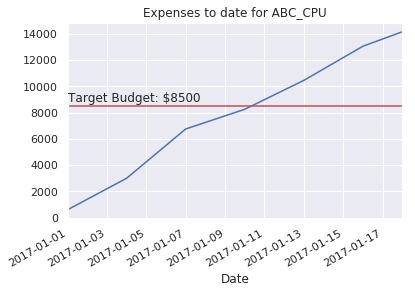

In [102]:

df['spend'].plot()
#add reference line showing budget target
plt.axhline(y=budget, color='r', linestyle='-')
text(x=df.index.min(), y=budget+budget/25, s="Target Budget: $"+str(budget))
plt.title('Expenses to date for '+project_name);


In [0]:
df.index.max()

Timestamp('2017-01-18 00:00:00')